In [153]:
#Importing Library's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
#Import dataset
vgsales = r"D:\School\SpringBoard-BAnderson1214\vgsales.csv"
game_sales = pd.read_csv(vgsales)
#check that data has loaded
game_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [155]:
#check data types
game_sales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [156]:
#initial info of data
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [157]:
#check for missing values
game_sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [158]:
#view rows with NaN values
rows_na = game_sales[game_sales.isnull().any(axis=1)]
print(rows_na)

        Rank                             Name Platform    Year         Genre  \
179      180                  Madden NFL 2004      PS2     NaN        Sports   
377      378                 FIFA Soccer 2004      PS2     NaN        Sports   
431      432       LEGO Batman: The Videogame      Wii     NaN        Action   
470      471       wwe Smackdown vs. Raw 2006      PS2     NaN      Fighting   
607      608                   Space Invaders     2600     NaN       Shooter   
...      ...                              ...      ...     ...           ...   
16427  16430                     Virtua Quest       GC     NaN  Role-Playing   
16493  16496                       The Smurfs      3DS     NaN        Action   
16494  16497  Legends of Oz: Dorothy's Return      3DS  2014.0        Puzzle   
16543  16546           Driving Simulator 2011       PC  2011.0        Racing   
16553  16556                   Bound By Flame     X360  2014.0  Role-Playing   

                                    Pub

In [159]:
#I have found missing values in release year as well as publisher.  
#The items with a missing publisher will be dropped.  
#I would like to know what will be affected if I were to drop the items with a missing year.
#subset platform to inspect missing values
platform_na = game_sales.loc[game_sales['Year'].isna()]
print(platform_na)

        Rank                         Name Platform  Year         Genre  \
179      180              Madden NFL 2004      PS2   NaN        Sports   
377      378             FIFA Soccer 2004      PS2   NaN        Sports   
431      432   LEGO Batman: The Videogame      Wii   NaN        Action   
470      471   wwe Smackdown vs. Raw 2006      PS2   NaN      Fighting   
607      608               Space Invaders     2600   NaN       Shooter   
...      ...                          ...      ...   ...           ...   
16307  16310                Freaky Flyers       GC   NaN        Racing   
16327  16330                    Inversion       PC   NaN       Shooter   
16366  16369  Hakuouki: Shinsengumi Kitan      PS3   NaN     Adventure   
16427  16430                 Virtua Quest       GC   NaN  Role-Playing   
16493  16496                   The Smurfs      3DS   NaN        Action   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
179                           El

In [160]:
print(game_sales['Platform'].value_counts())

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


In [161]:
subset_na = game_sales[game_sales['Year'].isna()]
print(subset_na)

        Rank                         Name Platform  Year         Genre  \
179      180              Madden NFL 2004      PS2   NaN        Sports   
377      378             FIFA Soccer 2004      PS2   NaN        Sports   
431      432   LEGO Batman: The Videogame      Wii   NaN        Action   
470      471   wwe Smackdown vs. Raw 2006      PS2   NaN      Fighting   
607      608               Space Invaders     2600   NaN       Shooter   
...      ...                          ...      ...   ...           ...   
16307  16310                Freaky Flyers       GC   NaN        Racing   
16327  16330                    Inversion       PC   NaN       Shooter   
16366  16369  Hakuouki: Shinsengumi Kitan      PS3   NaN     Adventure   
16427  16430                 Virtua Quest       GC   NaN  Role-Playing   
16493  16496                   The Smurfs      3DS   NaN        Action   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
179                           El

In [162]:
# Get unique values from the 'Year' column and sort them
unique_years = game_sales['Year'].unique()
sorted_unique_years = sorted(unique_years)

# Print the sorted unique years
print(sorted_unique_years)

[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan, 2016.0, 2017.0, 2020.0]


In [163]:
# Get unique publisher names
print(game_sales['Publisher'].unique())

['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' nan 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Activision Value' 'Banpresto'
 'D3Publisher' 'Oxygen Interactive' 'Red Storm Entertainmen

In [164]:
# Find games with Unknown publisher
print(game_sales[game_sales['Publisher']=='Unknown'])

        Rank                                               Name Platform  \
940      942                    Gran Turismo Concept 2001 Tokyo      PS2   
1649    1651                                NASCAR Thunder 2003      PS2   
2114    2116                                       Suikoden III      PS2   
2173    2175                                   Wheel of Fortune      PS2   
2236    2238                       Teenage Mutant Ninja Turtles      GBA   
...      ...                                                ...      ...   
16460  16463     Horse Life 4: My Horse, My Friend, My Champion      3DS   
16493  16496                                         The Smurfs      3DS   
16532  16535                            STORM: Frontline Nation       PC   
16545  16548  The Treasures of Mystery Island 3 Pack - Save ...       PC   
16581  16584                                          Fit & Fun      Wii   

         Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
940    2001.0   

In [165]:
# Cleaning up missing values
clean_df1 = game_sales.dropna()
print(clean_df1)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

In [166]:
# Check to see if "Unknown" is still under publishers
print(clean_df1[clean_df1['Publisher'] == 'Unknown'])

        Rank                                               Name Platform  \
940      942                    Gran Turismo Concept 2001 Tokyo      PS2   
2236    2238                       Teenage Mutant Ninja Turtles      GBA   
2328    2330                                  Blitz: The League      PS2   
2491    2493                                   The Game of Life       PS   
2544    2546                               Final Fantasy Type-0      PSP   
...      ...                                                ...      ...   
16424  16427                    Real Crimes: The Unicorn Killer       DS   
16460  16463     Horse Life 4: My Horse, My Friend, My Champion      3DS   
16532  16535                            STORM: Frontline Nation       PC   
16545  16548  The Treasures of Mystery Island 3 Pack - Save ...       PC   
16581  16584                                          Fit & Fun      Wii   

         Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
940    2001.0   

In [167]:
# Removing "Unknown" publishers
clean_df1 = clean_df1[clean_df1['Publisher'] != 'Unknown']
# Check to confirm "Unknown" is gone
print(clean_df1[clean_df1['Publisher'] == 'Unknown'])

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []


In [168]:
# Double check that we removed missing values
print(clean_df1.isna().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [169]:
# Check for duplicate data
duplicates = clean_df1.duplicated().sum()
print(duplicates)

0


In [170]:
df = clean_df1

In [171]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [172]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16191.000000,16191.000000,16191.000000,16191.000000,16191.000000,16191.000000,16191.000000
mean,8266.581002,2006.383732,0.266943,0.148414,0.079115,0.048664,0.543409
std,4787.519132,5.833054,0.824741,0.510715,0.312686,0.190624,1.571720
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4115.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8260.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12403.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [173]:
# predict which market will have more growth.
# year, sales - box plot
# rank - scatter plot

In [174]:
df.Year.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 2016., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

In [175]:
df['Year'] = df['Year'].astype(int)
df.Year.unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

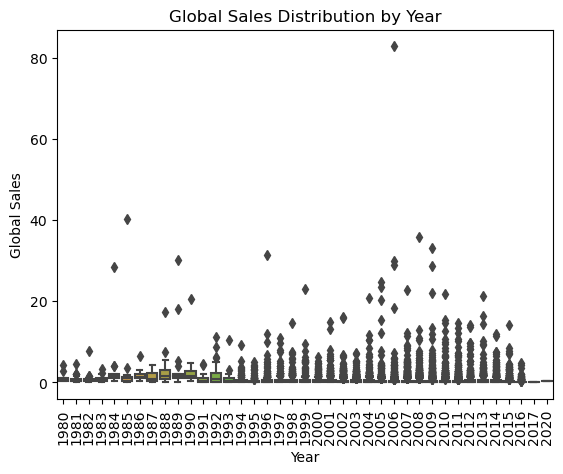

In [176]:
import seaborn as sns

# Box plot of year vs global sales

sns.boxplot(x='Year', y='Global_Sales', data=df)

plt.xticks(rotation=90) 

plt.title("Global Sales Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.show()


In [177]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


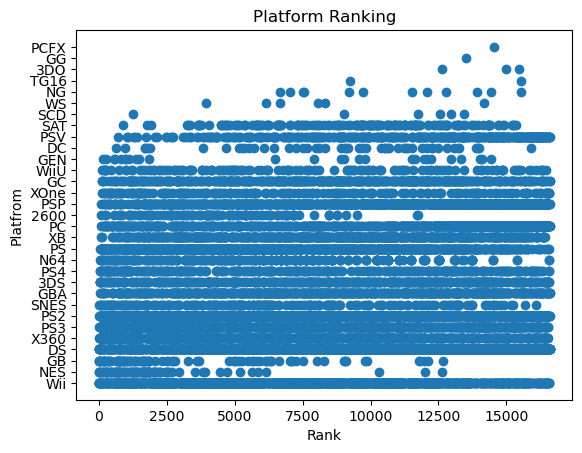

In [178]:
plt.scatter(df['Rank'], df['Platform'])

plt.xlabel('Rank')
plt.ylabel('Platfrom')
plt.title('Platform Ranking')

plt.show()

In [179]:
# Subset platforms into companies
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [180]:
Nintendo = ['Wii', 'NES', 'GB', 'DS','SNES', 'GBA','3DS','N64','GC''WiiU']
Microsoft = ['X360', 'XB', 'XOne']
Sony = [ 'PS3', 'PS2', 'PS4', 'PS', 'PSP', 'PSV']
Sega = [ 'GEN', 'DC', 'SAT', 'SCD', 'GG']

nesdata = df[df['Platform'].isin(Nintendo)]
microdata = df[df['Platform'].isin(Microsoft)]
sonydata = df[df['Platform'].isin(Sony)]
segadata = df[df['Platform'].isin(Sega)]

mainco = Nintendo + Microsoft + Sony + Sega

other = df[~df['Platform'].isin(mainco)]

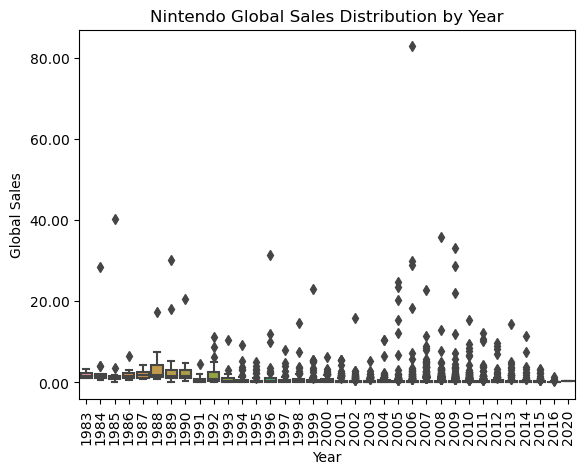

In [181]:
import matplotlib.ticker as mticker

sns.boxplot(x='Year', y='Global_Sales', data=nesdata)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}')) 

plt.xticks(rotation=90) 

plt.title("Nintendo Global Sales Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.show()


# Too much data needs refining

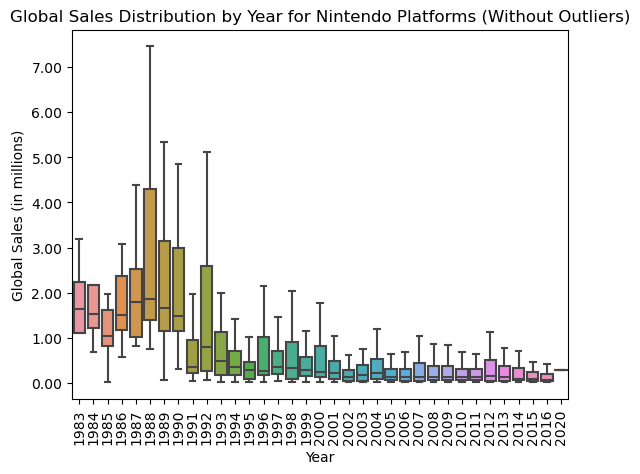

In [182]:
# Same graph but without outliers
sns.boxplot(x='Year', y='Global_Sales', data=nesdata, showfliers=False)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
plt.xticks(rotation=90)

plt.title("Global Sales Distribution by Year for Nintendo Platforms (Without Outliers)")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.show()


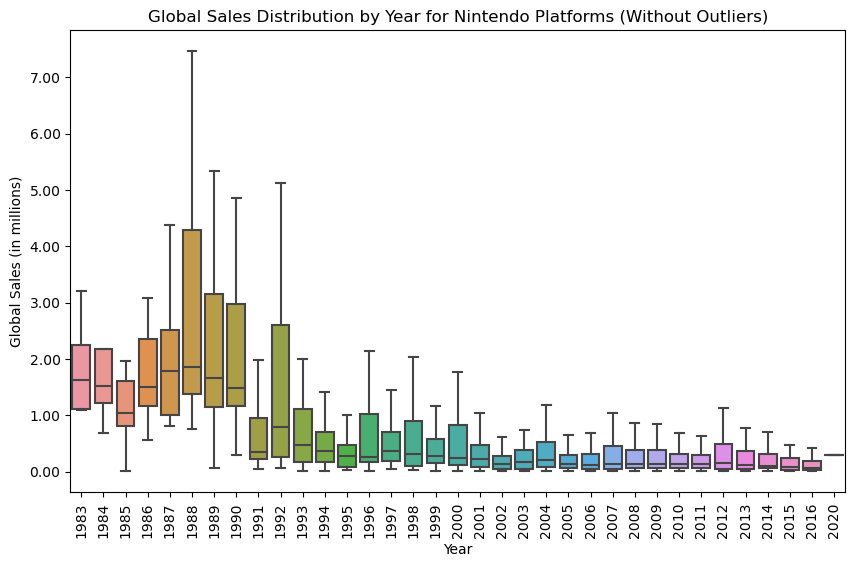

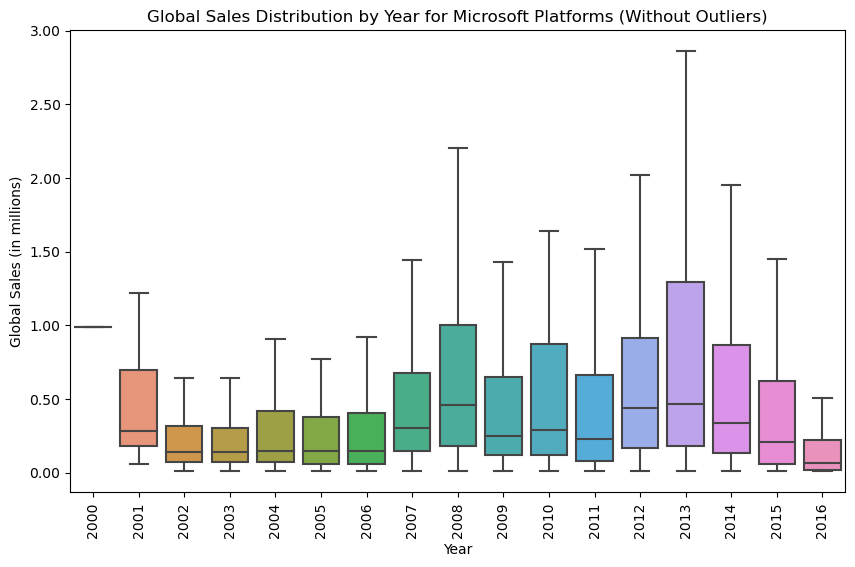

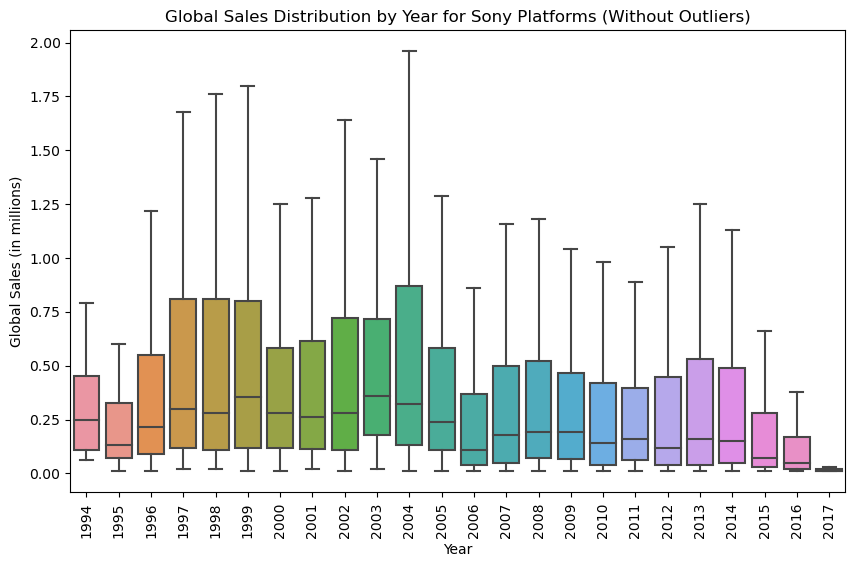

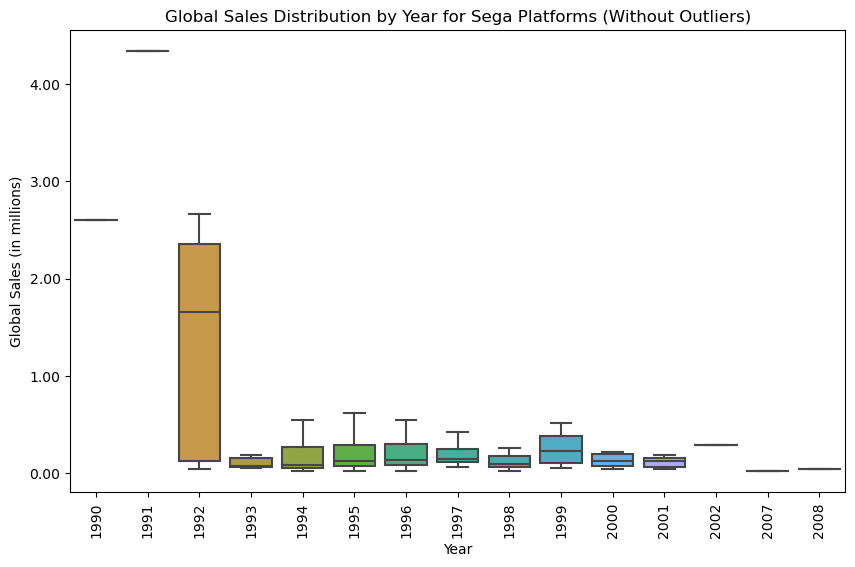

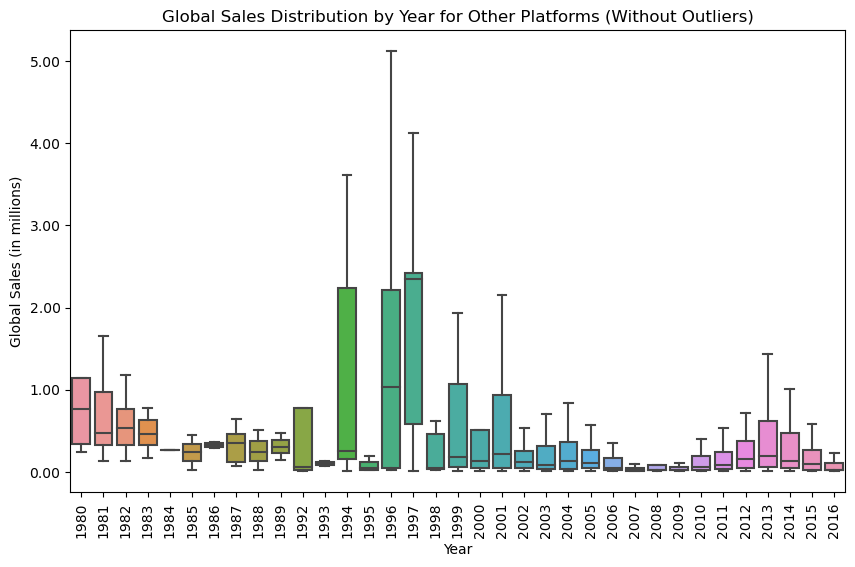

In [183]:
# Define a dictionary for easier iteration
data_subsets = {"Nintendo": nesdata, "Microsoft": microdata, "Sony": sonydata, "Sega": segadata, "Other": other}

for name, subset in data_subsets.items():
    if subset.empty:
        print(f"No data available for {name}.")
        continue
    
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(x='Year', y='Global_Sales', data=subset, showfliers=False)

    # Format y-axis ticks
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

    # Rotate x-axis labels
    plt.xticks(rotation=90)

    # Add plot title and labels
    plt.title(f"Global Sales Distribution by Year for {name} Platforms (Without Outliers)")
    plt.xlabel("Year")
    plt.ylabel("Global Sales (in millions)")

    # Show the plot
    plt.show()

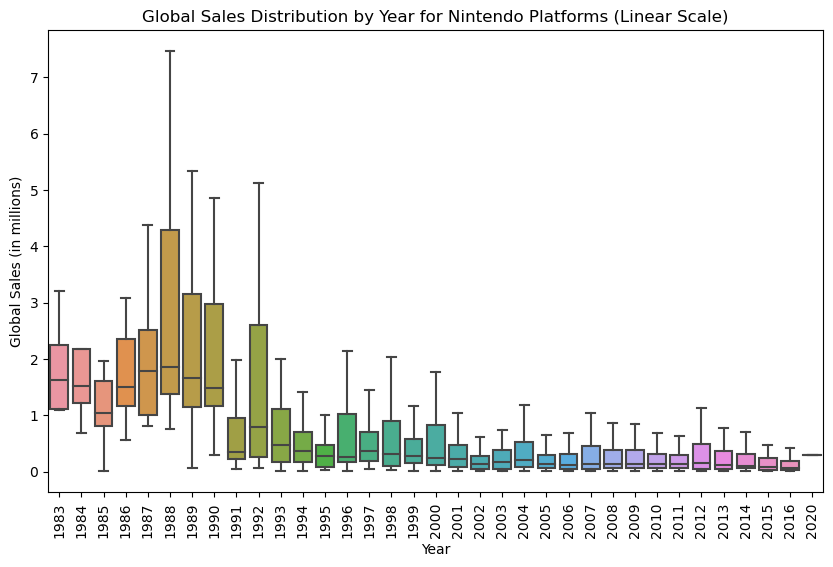

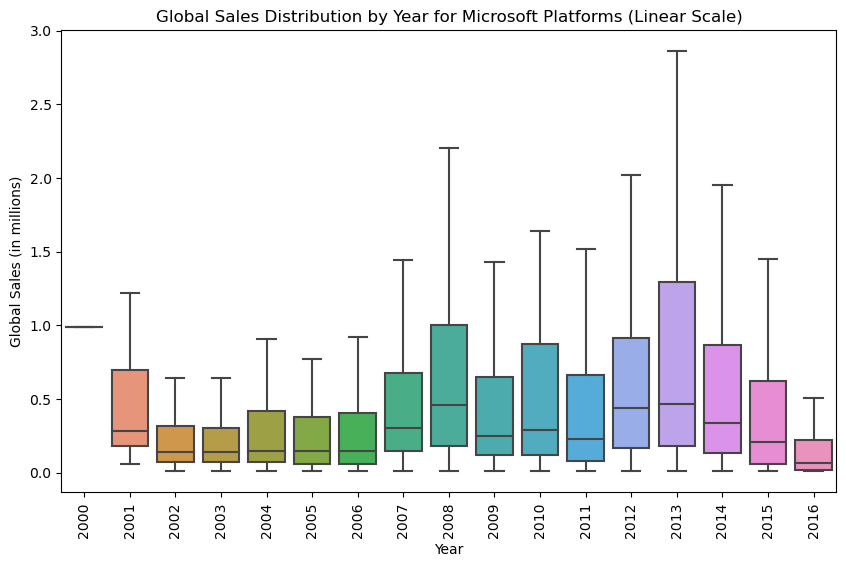

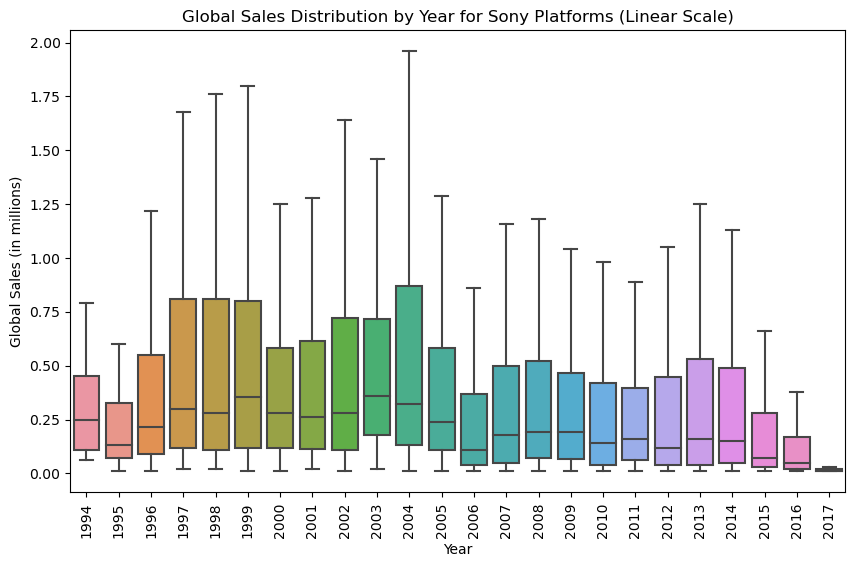

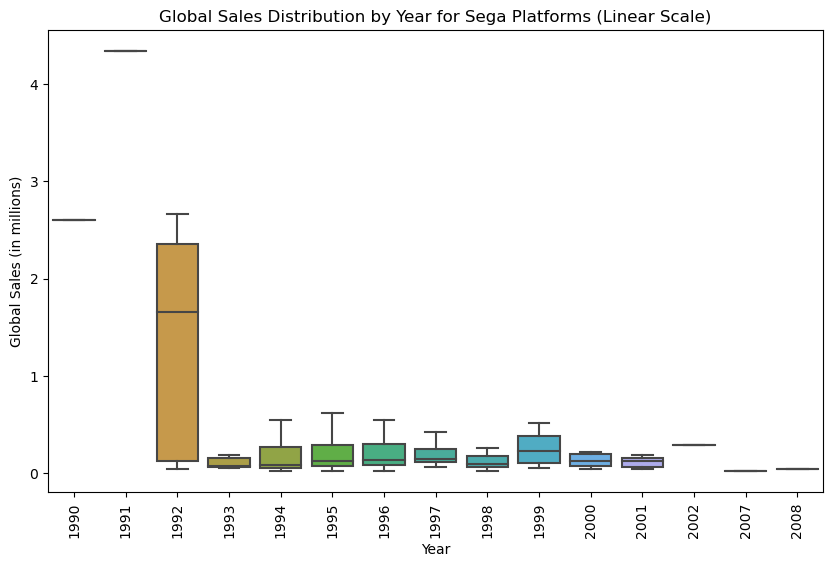

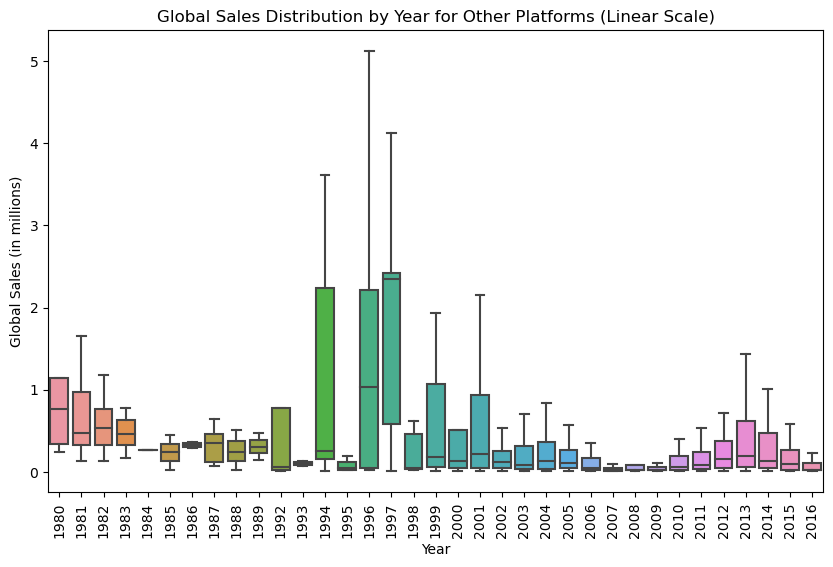

In [184]:
# Now with linear scale
for name, subset in data_subsets.items():
    if subset.empty:
        print(f"No data available for {name}.")
        continue

    plt.figure(figsize=(10, 6))  
    sns.boxplot(x='Year', y='Global_Sales', data=subset, showfliers=False)

    plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.gca().yaxis.get_major_formatter().set_useOffset(False)  # Disable offset
    plt.gca().yaxis.get_major_formatter().set_scientific(False)  # Disable scientific notation

    plt.xticks(rotation=90)

    plt.title(f"Global Sales Distribution by Year for {name} Platforms (Linear Scale)")
    plt.xlabel("Year")
    plt.ylabel("Global Sales (in millions)")

    plt.show()

# Sega is no longer making consoles and can be ruled out for our predictions
# In the "Other" subset, PC is the main platform to focus on.

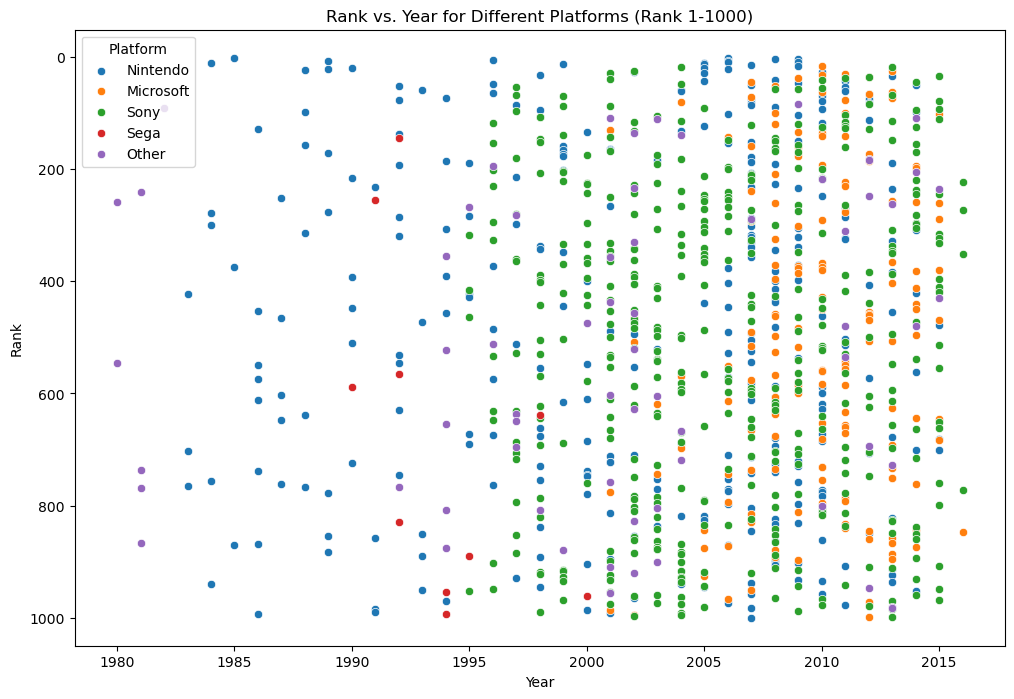

In [185]:
plt.figure(figsize=(12, 8)) 

for name, subset in data_subsets.items():
    if subset.empty:
        print(f"No data available for {name}.")
        continue
    
    subset_filtered = subset[(subset['Rank'] >= 1) & (subset['Rank'] <= 1000)]
    
    sns.scatterplot(x='Year', y='Rank', data=subset_filtered, label=name)

plt.gca().invert_yaxis()

plt.title("Rank vs. Year for Different Platforms (Rank 1-1000)")
plt.xlabel("Year")
plt.ylabel("Rank")

plt.legend(title='Platform')

plt.show()

# Skatter plot is not a good way to read this data, too many points. We will try a heat map.

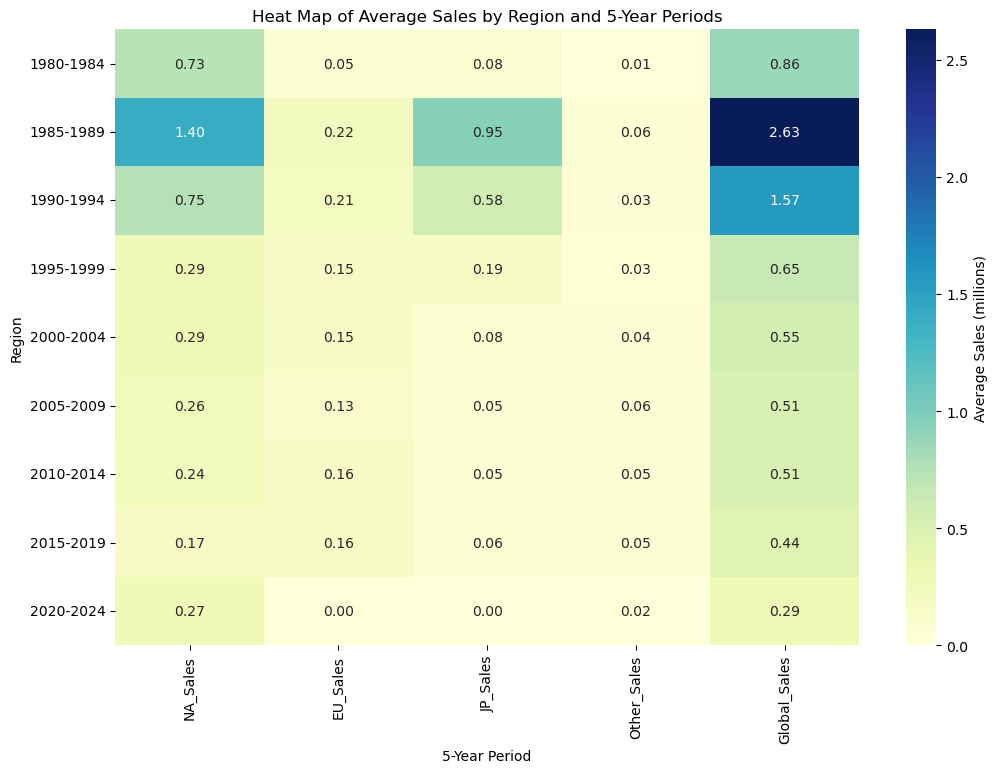

In [186]:
# Create bins for 5-year periods
df['Year_Binned'] = pd.cut(
    df['Year'], 
    bins=np.arange(df['Year'].min() - 1, df['Year'].max() + 5, 5),  # Create bins every 5 years
    labels=[f"{start}-{start+4}" for start in range(df['Year'].min(), df['Year'].max() + 1, 5)],
    right=False
)

# Aggregate data by the 5-year bins
heatmap_data = df.groupby('Year_Binned')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Average Sales (millions)'}
)

# Add titles and labels
plt.title("Heat Map of Average Sales by Region and 5-Year Periods")
plt.xlabel("5-Year Period")
plt.ylabel("Region")

# Rotate the x-ticks for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


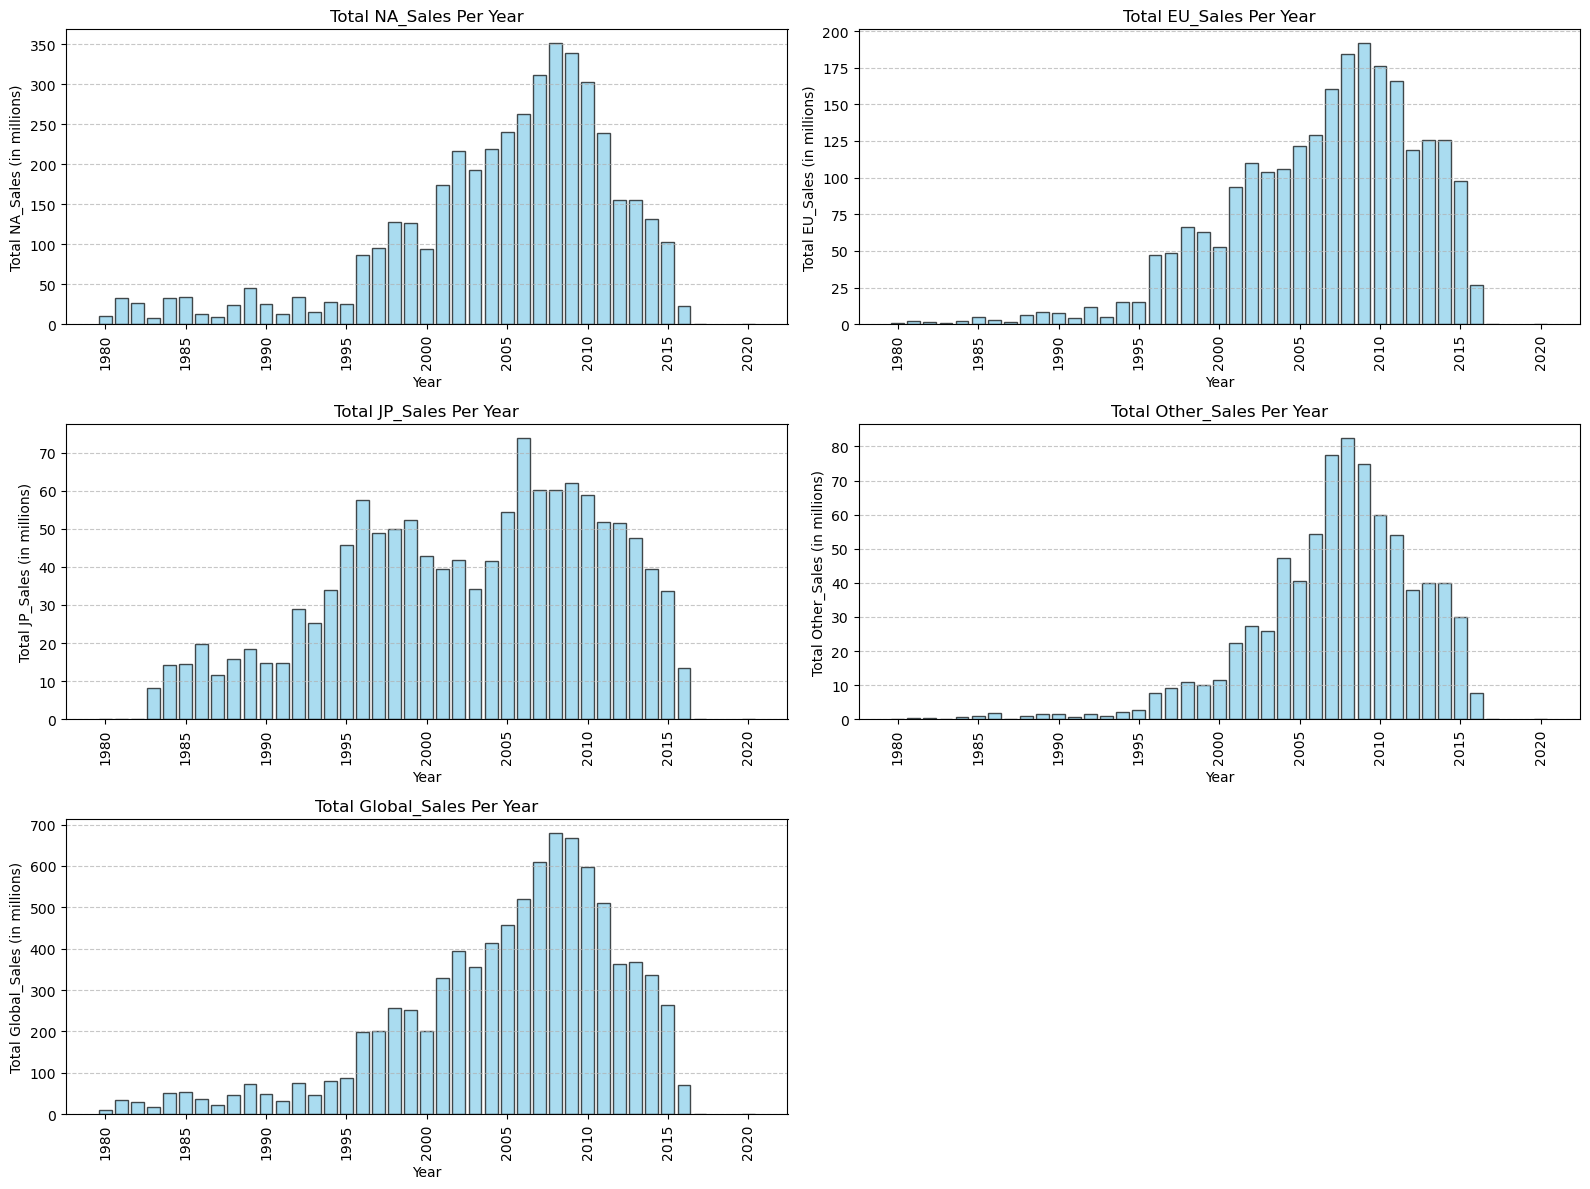

In [187]:
# Aggregate sales by year
yearly_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

# Define sales categories
sales_categories = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Create subplots for histograms
plt.figure(figsize=(16, 12))  # Adjust figure size for better readability

for i, category in enumerate(sales_categories, start=1):
    plt.subplot(3, 2, i)  # Create a 3x2 grid of subplots
    plt.bar(yearly_sales.index, yearly_sales[category], color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Total {category} Per Year")
    plt.xlabel("Year")
    plt.ylabel(f"Total {category} (in millions)")
    plt.xticks(rotation=90)  # Rotate x-ticks for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# These graphs look good for seeing distribution

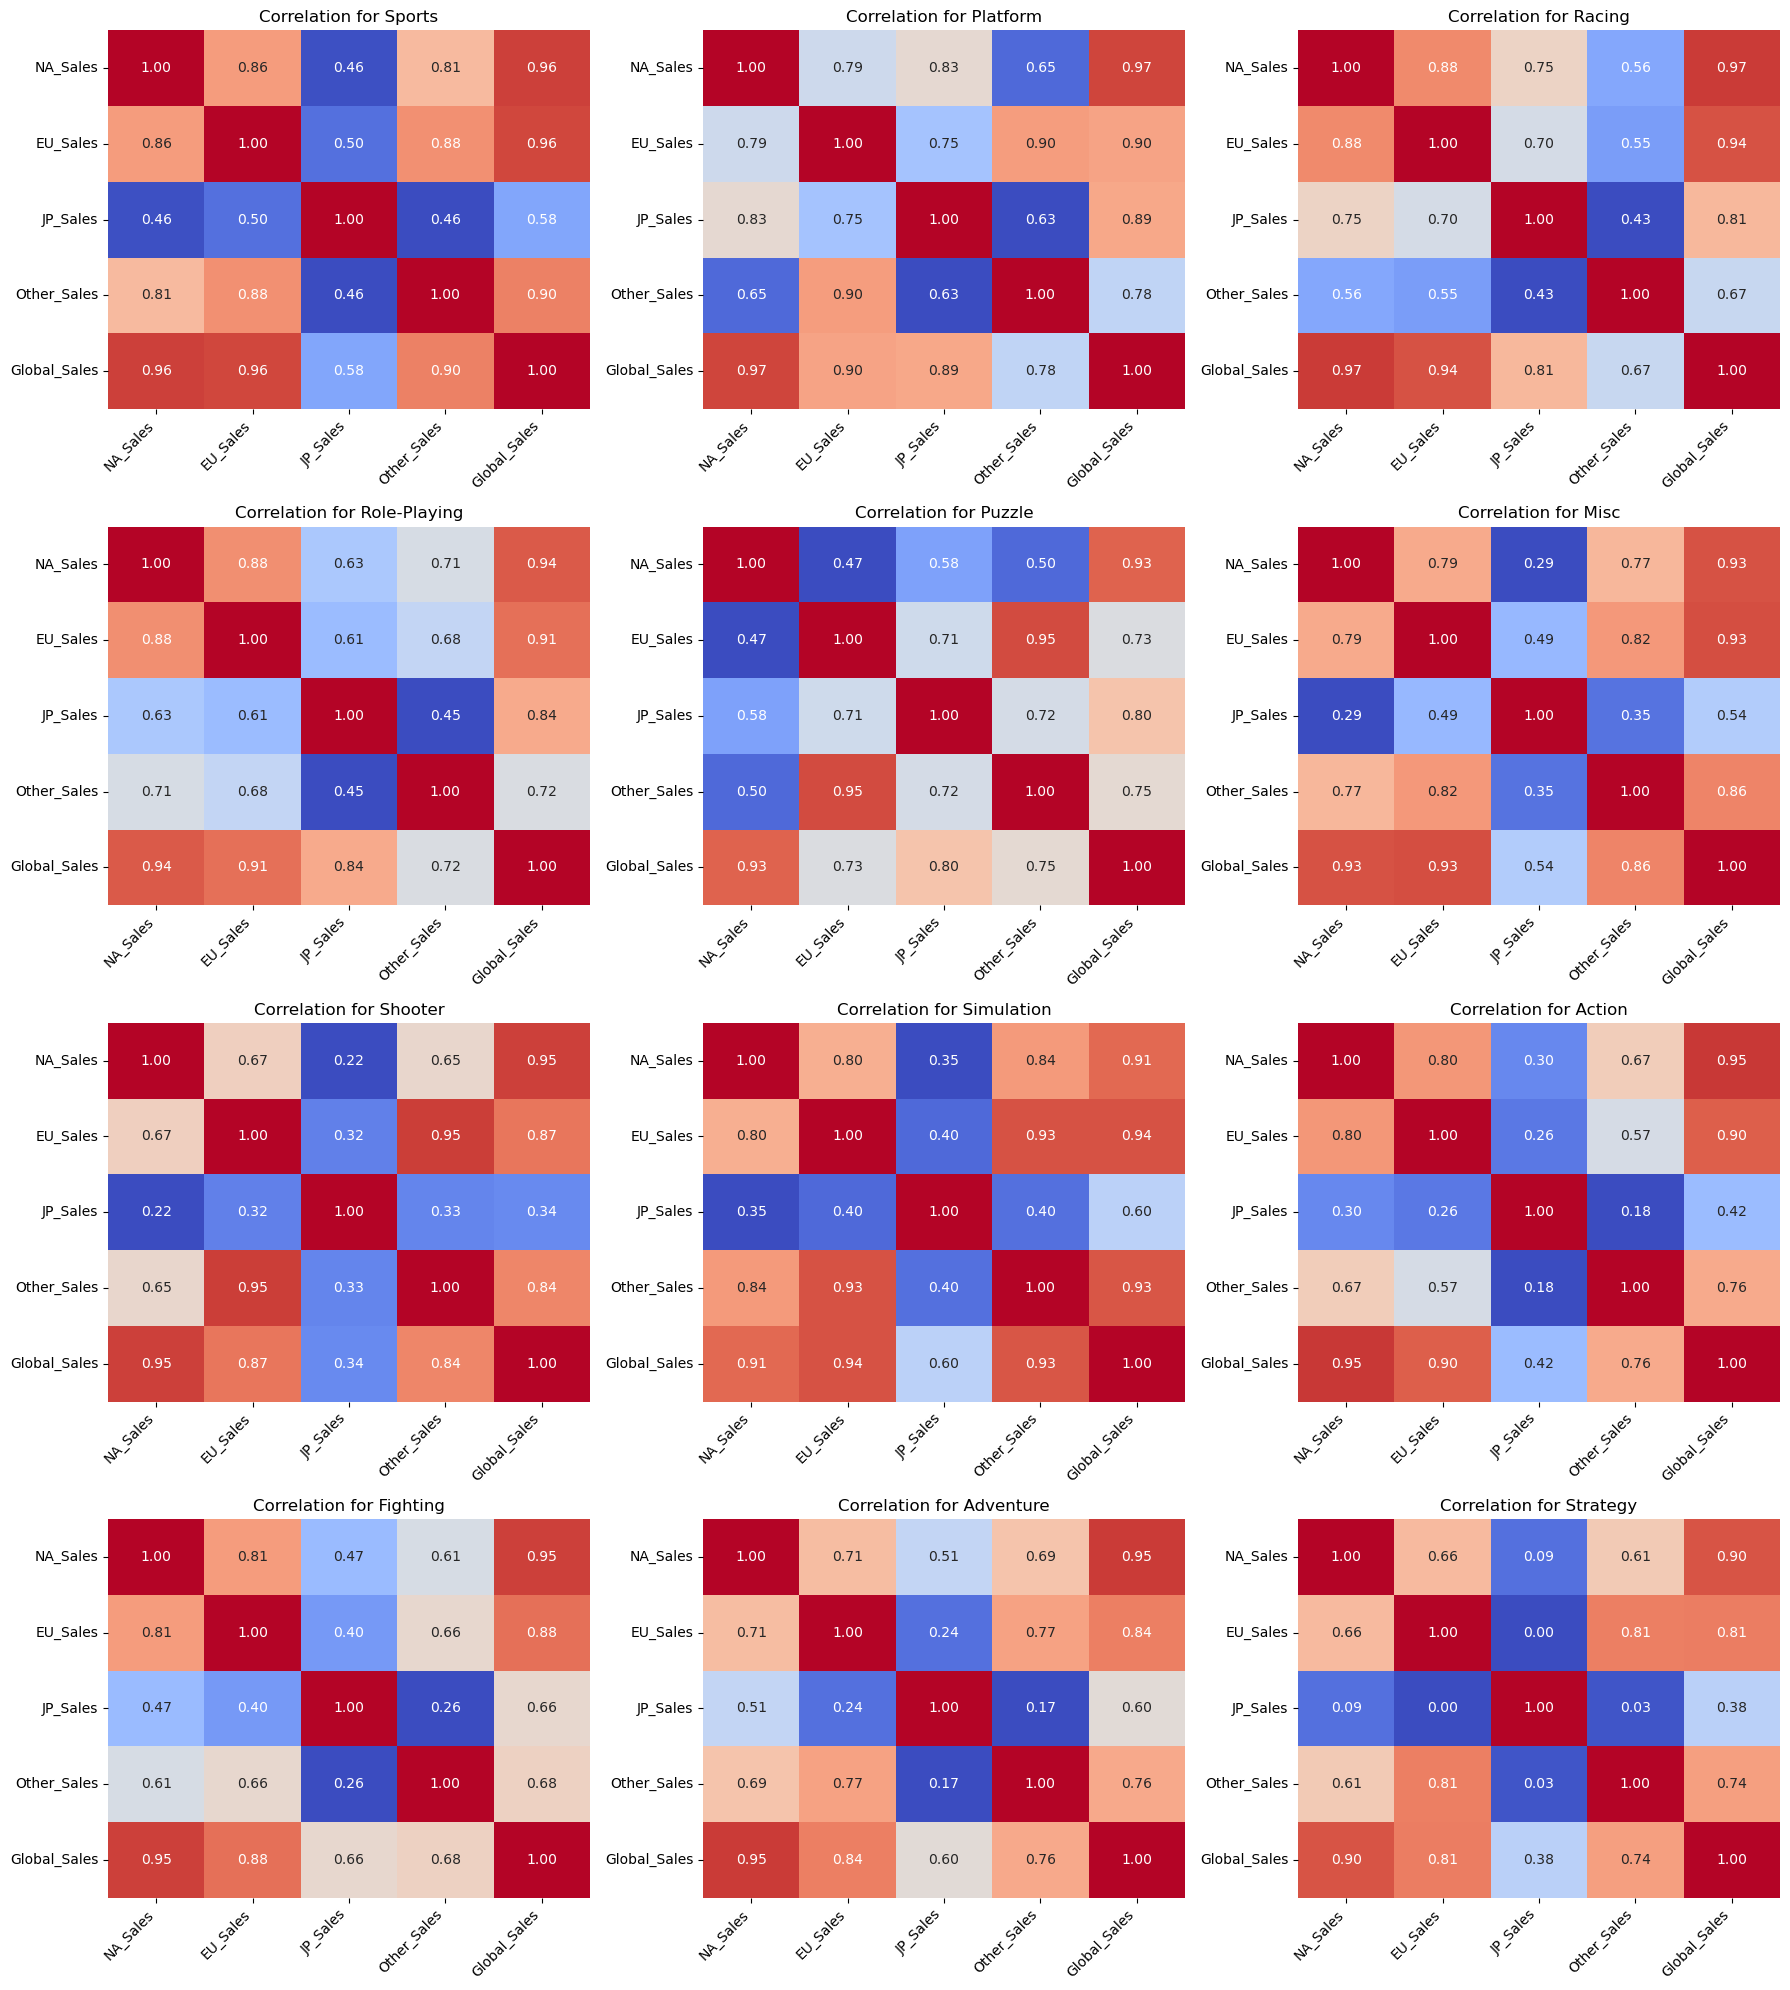

In [188]:
# Get the list of unique genres
genres = df['Genre'].unique()

# Create subplots for each genre
n_genres = len(genres)
fig, axes = plt.subplots(nrows=(n_genres + 2) // 3, ncols=3, figsize=(18, 5 * ((n_genres + 2) // 3)))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through each genre and calculate correlation
for i, genre in enumerate(genres):
    # Filter data for the current genre
    genre_data = df[df['Genre'] == genre][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
    
    # Calculate the correlation matrix
    correlation_matrix = genre_data.corr()
    
    # Plot heatmap
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        cbar=False,
        ax=axes[i]
    )
    axes[i].set_title(f"Correlation for {genre}")
    axes[i].set_xticklabels(correlation_matrix.columns, rotation=45, ha="right")
    axes[i].set_yticklabels(correlation_matrix.columns, rotation=0)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [189]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2005-2009
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985-1989
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2005-2009
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2010-2014
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1995-1999


# The "Publisher" column has too many variables and can be simplified, this will be needed when making dummies.

In [190]:
# Platform subsets
Nintendo = ['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', '3DS', 'N64', 'GC', 'WiiU']
Microsoft = ['X360', 'XB', 'XOne']
Sony = ['PS3', 'PS2', 'PS4', 'PS', 'PSP', 'PSV']
Sega = [ 'GEN', 'DC', 'SAT', 'SCD', 'GG']
PC = ['PC'] 

# Create a mapping dictionary
platform_to_publisher = {
    **{platform: 'Nintendo' for platform in Nintendo},
    **{platform: 'Microsoft' for platform in Microsoft},
    **{platform: 'Sony' for platform in Sony},
    **{platform: 'Sega' for platform in Sega},
    **{platform: 'PC' for platform in PC},
}

# Replace Publisher values based on the Platform
df['Publisher'] = df['Platform'].map(platform_to_publisher).fillna(df['Publisher'])

print(df.head())

   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales Year_Binned  
0     41.49     29.02      3.77         8.46         82.74   2005-2009  
1     29.08      3.58      6.81         0.77         40.24   1985-1989  
2     15.85     12.88      3.79         3.31         35.82   2005-2009  
3     15.75     11.01      3.28         2.96         33.00   2010-2014  
4     11.27      8.89     10.22         1.00         31.37   1995-1999  


In [191]:
df.Publisher.unique()

array(['Nintendo', 'Microsoft', 'Sony', 'PC', 'Atari', 'Sega',
       'Activision', 'Parker Bros.', 'Imagic', 'Coleco', 'Quelle',
       'Mystique', '20th Century Fox Video Games', 'Men-A-Vision',
       'Tigervision', 'Mattel Interactive', 'Universal Gamex',
       'Wizard Video Games', 'CPG Products', 'SquareSoft',
       'Answer Software', 'Data Age', 'ITT Family Games',
       'Starpath Corp.', 'CBS Electronics', 'Namco Bandai Games', 'SNK',
       'Taito', 'Bomb', 'Avalon Interactive', 'NEC',
       'Konami Digital Entertainment', 'Hudson Soft', 'Micro Cabin',
       'Imageworks', 'Technos Japan Corporation'], dtype=object)

# I suspect that some of this data is not needed and will confuse my dummies

In [192]:
# Get unique publishers
unique_publishers = df['Publisher'].unique()

# Loop through each unique publisher and display the associated data
for publisher in unique_publishers:
    print(f"Data for Publisher: {publisher}")
    display(df[df['Publisher'] == publisher])  # Use display to show the subset of data
    print("\n")  # Adding a newline for readability


Data for Publisher: Nintendo


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2005-2009
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985-1989
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2005-2009
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2010-2014
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1995-1999
...,...,...,...,...,...,...,...,...,...,...,...,...
16592,16595,Plushees,DS,2008,Simulation,Nintendo,0.01,0.00,0.00,0.00,0.01,2005-2009
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Nintendo,0.01,0.00,0.00,0.00,0.01,2000-2004
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Nintendo,0.01,0.00,0.00,0.00,0.01,2000-2004
16596,16599,Know How 2,DS,2010,Puzzle,Nintendo,0.00,0.01,0.00,0.00,0.01,2010-2014




Data for Publisher: Microsoft


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft,14.97,4.94,0.24,1.67,21.82,2010-2014
23,24,Grand Theft Auto V,X360,2013,Action,Microsoft,9.63,5.31,0.06,1.38,16.38,2010-2014
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Microsoft,9.03,4.28,0.13,1.32,14.76,2010-2014
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Microsoft,9.67,3.73,0.11,1.13,14.64,2010-2014
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Microsoft,8.25,4.30,0.07,1.12,13.73,2010-2014
...,...,...,...,...,...,...,...,...,...,...,...,...
16531,16534,Hitman (2016),XOne,2016,Action,Microsoft,0.00,0.01,0.00,0.00,0.01,2015-2019
16533,16536,Metal Gear Solid HD Edition,X360,2011,Action,Microsoft,0.00,0.00,0.01,0.00,0.01,2010-2014
16562,16565,Mighty No. 9,XOne,2016,Platform,Microsoft,0.01,0.00,0.00,0.00,0.01,2015-2019
16569,16572,Resident Evil 4 HD,XOne,2016,Shooter,Microsoft,0.01,0.00,0.00,0.00,0.01,2015-2019




Data for Publisher: Sony


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
16,17,Grand Theft Auto V,PS3,2013,Action,Sony,7.01,9.27,0.97,4.14,21.40,2010-2014
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Sony,9.43,0.40,0.41,10.57,20.81,2005-2009
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Sony,8.41,5.49,0.47,1.78,16.15,2000-2004
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony,6.85,5.09,1.87,1.16,14.98,2000-2004
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Sony,5.77,5.81,0.35,2.31,14.24,2015-2019
...,...,...,...,...,...,...,...,...,...,...,...,...
16575,16578,Neo Angelique Special,PSP,2008,Adventure,Sony,0.00,0.00,0.01,0.00,0.01,2005-2009
16580,16583,Real Rode,PS2,2008,Adventure,Sony,0.00,0.00,0.01,0.00,0.01,2005-2009
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,Sony,0.00,0.00,0.01,0.00,0.01,2015-2019
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Sony,0.00,0.00,0.01,0.00,0.01,2005-2009




Data for Publisher: PC


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
83,84,The Sims 3,PC,2009,Simulation,PC,0.98,6.42,0.0,0.71,8.11,2010-2014
137,138,World of Warcraft,PC,2004,Role-Playing,PC,0.07,6.21,0.0,0.00,6.28,2005-2009
181,182,Diablo III,PC,2012,Role-Playing,PC,2.43,2.15,0.0,0.62,5.20,2010-2014
194,195,Microsoft Flight Simulator,PC,1996,Simulation,PC,3.22,1.69,0.0,0.20,5.12,1995-1999
217,218,StarCraft II: Wings of Liberty,PC,2010,Strategy,PC,2.56,1.68,0.0,0.59,4.83,2010-2014
...,...,...,...,...,...,...,...,...,...,...,...,...
16558,16561,Pro Evolution Soccer 2008,PC,2007,Sports,PC,0.00,0.01,0.0,0.00,0.01,2005-2009
16566,16569,End of Nations,PC,2012,Strategy,PC,0.01,0.00,0.0,0.00,0.01,2010-2014
16577,16580,Damnation,PC,2009,Shooter,PC,0.00,0.01,0.0,0.00,0.01,2010-2014
16585,16588,Breach,PC,2011,Shooter,PC,0.01,0.00,0.0,0.00,0.01,2010-2014




Data for Publisher: Atari


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
89,90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81,1980-1984
258,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31,1980-1984
544,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76,1980-1984
864,866,E.T.: The Extra Terrestrial,2600,1981,Action,Atari,1.84,0.11,0.0,0.02,1.97,1980-1984
1106,1108,Ms. Pac-Man,2600,1981,Puzzle,Atari,1.54,0.10,0.0,0.02,1.65,1980-1984
1115,1117,Dig Dug,2600,1982,Puzzle,Atari,1.52,0.10,0.0,0.02,1.64,1980-1984
1163,1165,Mario Bros.,2600,1982,Platform,Atari,1.48,0.09,0.0,0.02,1.59,1980-1984
1429,1431,Centipede,2600,1981,Shooter,Atari,1.26,0.08,0.0,0.01,1.36,1980-1984
1705,1707,Pole Position,2600,1982,Racing,Atari,1.10,0.07,0.0,0.01,1.18,1980-1984
1817,1819,Moon Patrol,2600,1982,Shooter,Atari,1.05,0.06,0.0,0.01,1.12,1980-1984




Data for Publisher: Sega


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
143,144,Sonic the Hedgehog 2,GEN,1992,Platform,Sega,4.47,1.20,0.16,0.19,6.03,1990-1994
254,255,Sonic the Hedgehog,GEN,1991,Platform,Sega,3.03,0.91,0.26,0.13,4.34,1990-1994
564,565,Mortal Kombat,GEN,1992,Fighting,Sega,1.95,0.63,0.00,0.09,2.67,1990-1994
588,589,Streets of Rage,GEN,1990,Action,Sega,1.86,0.55,0.11,0.08,2.60,1990-1994
637,638,Sonic Adventure,DC,1998,Platform,Sega,1.26,0.61,0.46,0.08,2.42,1995-1999
...,...,...,...,...,...,...,...,...,...,...,...,...
15185,15188,Shippuu Mahou Daisakusen: Kingdom-Grandprix,SAT,1996,Shooter,Sega,0.00,0.00,0.02,0.00,0.02,1995-1999
15256,15259,Pebble Beach Golf Links,SAT,1994,Sports,Sega,0.00,0.00,0.02,0.00,0.02,1995-1999
15289,15292,NightTruth: Explanation of the Paranormal - Th...,SAT,1996,Misc,Sega,0.00,0.00,0.02,0.00,0.02,1995-1999
15346,15349,Code R,SAT,1998,Adventure,Sega,0.00,0.00,0.02,0.00,0.02,1995-1999




Data for Publisher: Activision


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
239,240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.0,0.05,4.50,1980-1984
1153,1155,River Raid,2600,1981,Shooter,Activision,1.49,0.09,0.0,0.02,1.60,1980-1984
1508,1510,Pitfall II: Lost Caverns,2600,1983,Platform,Activision,1.22,0.07,0.0,0.02,1.31,1980-1984
1766,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15,1980-1984
1848,1850,Megamania,2600,1981,Shooter,Activision,1.03,0.06,0.0,0.01,1.10,1980-1984
2669,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77,1980-1984
3079,3081,Keystone Kapers,2600,1982,Action,Activision,0.62,0.04,0.0,0.01,0.66,1980-1984
3118,3120,Kung-Fu Master,2600,1987,Action,Activision,0.60,0.04,0.0,0.01,0.65,1985-1989
3643,3645,The Activision Decathlon,2600,1982,Sports,Activision,0.52,0.03,0.0,0.01,0.55,1980-1984
3940,3942,River Raid II,2600,1988,Shooter,Activision,0.47,0.03,0.0,0.01,0.51,1985-1989




Data for Publisher: Parker Bros.


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
734,736,Frogger,2600,1981,Action,Parker Bros.,2.06,0.12,0.0,0.02,2.20,1980-1984
2232,2234,Spider-Man,2600,1981,Action,Parker Bros.,0.87,0.05,0.0,0.01,0.93,1980-1984
3447,3449,Q*bert,2600,1982,Puzzle,Parker Bros.,0.55,0.03,0.0,0.01,0.58,1980-1984
3748,3750,Popeye,2600,1982,Platform,Parker Bros.,0.50,0.03,0.0,0.01,0.54,1980-1984
5559,5561,Frogger II: Threeedeep!,2600,1983,Action,Parker Bros.,0.31,0.02,0.0,0.00,0.33,1980-1984
7150,7152,Reactor,2600,1981,Action,Parker Bros.,0.21,0.01,0.0,0.00,0.22,1980-1984
8457,8459,Mr. Do!'s Castle,2600,1983,Action,Parker Bros.,0.15,0.01,0.0,0.00,0.17,1980-1984




Data for Publisher: Imagic


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
766,768,Demon Attack,2600,1981,Shooter,Imagic,1.99,0.12,0.0,0.02,2.13,1980-1984
1556,1558,Atlantis,2600,1981,Shooter,Imagic,1.18,0.08,0.0,0.01,1.27,1980-1984
1965,1967,Cosmic Ark,2600,1981,Shooter,Imagic,0.99,0.05,0.0,0.01,1.05,1980-1984
5127,5129,Dragonfire,2600,1981,Action,Imagic,0.35,0.02,0.0,0.00,0.37,1980-1984




Data for Publisher: Coleco


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
1306,1308,Donkey Kong,2600,1981,Platform,Coleco,1.36,0.08,0.0,0.02,1.46,1980-1984
3408,3410,Smurf: Rescue In Gargamel's Castle,2600,1981,Action,Coleco,0.55,0.03,0.0,0.01,0.59,1980-1984
4784,4786,Mouse Trap,2600,1981,Action,Coleco,0.38,0.02,0.0,0.00,0.40,1980-1984
5400,5402,Carnival,2600,1981,Shooter,Coleco,0.32,0.02,0.0,0.00,0.34,1980-1984
6265,6267,Mr. Do!,2600,1982,Action,Coleco,0.26,0.02,0.0,0.00,0.27,1980-1984




Data for Publisher: Quelle


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
2406,2408,Enduro,2600,1982,Misc,Quelle,0.81,0.05,0.0,0.01,0.87,1980-1984




Data for Publisher: Mystique


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
2516,2518,Custer's Revenge,2600,1981,Action,Mystique,0.76,0.05,0.0,0.01,0.82,1980-1984




Data for Publisher: 20th Century Fox Video Games


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
2596,2598,Alien,2600,1981,Action,20th Century Fox Video Games,0.74,0.04,0.0,0.01,0.79,1980-1984
5389,5391,Fantastic Voyage,2600,1981,Action,20th Century Fox Video Games,0.32,0.02,0.0,0.00,0.34,1980-1984
5395,5397,Bank Heist,2600,1982,Action,20th Century Fox Video Games,0.32,0.02,0.0,0.00,0.34,1980-1984
6728,6730,Porky's,2600,1982,Action,20th Century Fox Video Games,0.23,0.01,0.0,0.00,0.25,1980-1984
7148,7150,Deadly Duck,2600,1981,Shooter,20th Century Fox Video Games,0.21,0.01,0.0,0.00,0.22,1980-1984




Data for Publisher: Men-A-Vision


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
2664,2666,Air Raid,2600,1981,Action,Men-A-Vision,0.72,0.04,0.0,0.01,0.77,1980-1984




Data for Publisher: Tigervision


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
2940,2942,King Kong,2600,1981,Action,Tigervision,0.65,0.04,0.0,0.01,0.69,1980-1984
4402,4404,Jawbreaker,2600,1981,Action,Tigervision,0.42,0.03,0.0,0.00,0.45,1980-1984
6145,6147,Polaris,2600,1982,Action,Tigervision,0.26,0.02,0.0,0.00,0.28,1980-1984




Data for Publisher: Mattel Interactive


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
3044,3046,Adventures of Tron,2600,1981,Action,Mattel Interactive,0.63,0.03,0.0,0.01,0.67,1980-1984
3403,3405,BurgerTime,2600,1981,Puzzle,Mattel Interactive,0.55,0.03,0.0,0.01,0.59,1980-1984
4894,4896,Bump 'n' Jump,2600,1982,Racing,Mattel Interactive,0.37,0.02,0.0,0.00,0.39,1980-1984
5246,5248,Frogs And Flies,2600,1981,Action,Mattel Interactive,0.33,0.02,0.0,0.00,0.36,1980-1984
5800,5802,Astroblast,2600,1981,Action,Mattel Interactive,0.29,0.02,0.0,0.00,0.31,1980-1984
6940,6942,Dark Cavern,2600,1981,Shooter,Mattel Interactive,0.22,0.01,0.0,0.00,0.24,1980-1984
7904,7906,International Soccer,2600,1981,Sports,Mattel Interactive,0.18,0.01,0.0,0.00,0.19,1980-1984
8459,8461,Armor Ambush,2600,1981,Action,Mattel Interactive,0.15,0.01,0.0,0.00,0.17,1980-1984




Data for Publisher: Universal Gamex


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
3215,3217,X-Man,2600,1982,Action,Universal Gamex,0.58,0.04,0.0,0.01,0.63,1980-1984




Data for Publisher: Wizard Video Games


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
3266,3268,Halloween,2600,1982,Action,Wizard Video Games,0.58,0.03,0.0,0.01,0.62,1980-1984




Data for Publisher: CPG Products


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
3716,3718,Action Force,2600,1982,Action,CPG Products,0.5,0.03,0.0,0.01,0.54,1980-1984




Data for Publisher: SquareSoft


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
3931,3933,Final Fantasy,WS,2000,Role-Playing,SquareSoft,0.0,0.0,0.51,0.0,0.51,2000-2004
6669,6671,Final Fantasy II,WS,2001,Role-Playing,SquareSoft,0.0,0.0,0.25,0.0,0.25,2000-2004




Data for Publisher: Answer Software


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
4016,4018,Gauntlet,2600,1982,Action,Answer Software,0.46,0.03,0.0,0.01,0.5,1980-1984




Data for Publisher: Data Age


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
4967,4969,Airlock,2600,1981,Action,Data Age,0.36,0.02,0.0,0.0,0.39,1980-1984
5658,5660,Frankenstein's Monster,2600,1982,Action,Data Age,0.30,0.02,0.0,0.0,0.32,1980-1984




Data for Publisher: ITT Family Games


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
5381,5383,Alien's Return,2600,1982,Action,ITT Family Games,0.32,0.02,0.0,0.0,0.34,1980-1984




Data for Publisher: Starpath Corp.


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
5564,5566,Fireball,2600,1981,Action,Starpath Corp.,0.3,0.02,0.0,0.0,0.33,1980-1984




Data for Publisher: CBS Electronics


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
5773,5775,Mountain King,2600,1982,Action,CBS Electronics,0.29,0.02,0.0,0.0,0.31,1980-1984




Data for Publisher: Namco Bandai Games


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
6133,6135,Digimon Adventure: Anode Tamer,WS,1999,Role-Playing,Namco Bandai Games,0.0,0.0,0.28,0.0,0.28,2000-2004
8050,8052,Chocobo no Fushigi Dungeon for WonderSwan,WS,1999,Role-Playing,Namco Bandai Games,0.0,0.0,0.18,0.0,0.18,2000-2004
8306,8308,Super Robot Taisen Compact 2 Dai-1-Bu,WS,2000,Strategy,Namco Bandai Games,0.0,0.0,0.17,0.0,0.17,2000-2004
14172,14174,SD Gundam G Generation: Gather Beat 2,WS,2001,Strategy,Namco Bandai Games,0.0,0.0,0.03,0.0,0.03,2000-2004




Data for Publisher: SNK


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
6681,6683,Samurai Shodown II,NG,1994,Fighting,SNK,0.0,0.0,0.25,0.0,0.25,1995-1999
7045,7047,The King of Fighters '95 (CD),NG,1994,Fighting,SNK,0.0,0.0,0.23,0.0,0.23,1995-1999
7498,7500,The King of Fighters '95,NG,1995,Fighting,SNK,0.0,0.0,0.20,0.0,0.20,1995-1999
7553,7555,Samurai Spirits (CD),NG,1994,Fighting,SNK,0.0,0.0,0.20,0.0,0.20,1995-1999
9196,9198,The King of Fighters '94 (CD),NG,1993,Fighting,SNK,0.0,0.0,0.14,0.0,0.14,1990-1994
9717,9719,The King of Fighters '94,NG,1994,Fighting,SNK,0.0,0.0,0.12,0.0,0.12,1995-1999
11505,11507,Samurai Shodown III,NG,1995,Fighting,SNK,0.0,0.0,0.08,0.0,0.08,1995-1999
12084,12086,Samurai Shodown,NG,1993,Fighting,SNK,0.0,0.0,0.07,0.0,0.07,1990-1994
12787,12789,The King of Fighters '96,NG,1996,Fighting,SNK,0.0,0.0,0.06,0.0,0.06,1995-1999
13914,13916,Art of Fighting 3: The Path of the Warrior,NG,1996,Fighting,SNK,0.0,0.0,0.04,0.0,0.04,1995-1999




Data for Publisher: Taito


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
6866,6868,Front Line,2600,1981,Action,Taito,0.22,0.01,0.0,0.0,0.24,1980-1984




Data for Publisher: Bomb


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
7149,7151,Assault,2600,1982,Action,Bomb,0.21,0.01,0.0,0.0,0.22,1980-1984




Data for Publisher: Avalon Interactive


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
8458,8460,Death Trap,2600,1982,Action,Avalon Interactive,0.15,0.01,0.0,0.0,0.17,1980-1984




Data for Publisher: NEC


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
9223,9225,Doukyuusei,TG16,1995,Adventure,NEC,0.0,0.0,0.14,0.0,0.14,1995-1999
14556,14559,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,1996,Role-Playing,NEC,0.0,0.0,0.03,0.0,0.03,1995-1999




Data for Publisher: Konami Digital Entertainment


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
12635,12637,Policenauts,3DO,1995,Adventure,Konami Digital Entertainment,0.0,0.0,0.06,0.0,0.06,1995-1999




Data for Publisher: Hudson Soft


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
14429,14432,Far East of Eden Shinden,NG,1995,Fighting,Hudson Soft,0.0,0.0,0.03,0.0,0.03,1995-1999
15535,15538,Ginga Fukei Densetsu: Sapphire,TG16,1995,Shooter,Hudson Soft,0.0,0.0,0.02,0.0,0.02,1995-1999




Data for Publisher: Micro Cabin


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
14996,14999,Bust-A-Move,3DO,1994,Puzzle,Micro Cabin,0.0,0.0,0.02,0.0,0.02,1995-1999




Data for Publisher: Imageworks


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
15479,15482,Sotsugyou II: Neo Generation Special,3DO,1995,Simulation,Imageworks,0.0,0.0,0.02,0.0,0.02,1995-1999




Data for Publisher: Technos Japan Corporation


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned
15553,15556,Super Dodge Ball,NG,1995,Sports,Technos Japan Corporation,0.0,0.0,0.02,0.0,0.02,1995-1999


In [193]:
# Define the platform subsets
Nintendo = ['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', '3DS', 'N64', 'GC', 'WiiU']
Microsoft = ['X360', 'XB', 'XOne']
Sony = ['PS3', 'PS2', 'PS4', 'PS', 'PSP', 'PSV']
Sega = ['GEN', 'DC', 'SAT', 'SCD', 'GG']
PC = ['PC']

# Combine all subsets into one list
valid_platforms = Nintendo + Microsoft + Sony + Sega + PC

# Filter the DataFrame to keep only rows where 'Platform' is in the valid_platforms list
df_filtered = df[df['Platform'].isin(valid_platforms)]

# Check the result
print(df_filtered)


        Rank                                              Name Platform  Year  \
0          1                                        Wii Sports      Wii  2006   
1          2                                 Super Mario Bros.      NES  1985   
2          3                                    Mario Kart Wii      Wii  2008   
3          4                                 Wii Sports Resort      Wii  2009   
4          5                          Pokemon Red/Pokemon Blue       GB  1996   
...      ...                                               ...      ...   ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16594  16597                     Men in Black II: Alien Escape       GC  2003   
16595  16598  SCORE International Baja 1000: The Official Game      PS2  2008   
16596  16599                                        Know How 2       DS  2010   
16597  16600                                  Spirits & Spells      GBA  2003   

              Genre Publish

In [194]:
# First column, which is dropped, is 'Action'
df_dummies = pd.get_dummies(df_filtered[['Genre', 'Platform', 'Publisher']], drop_first=True)
print(df_dummies.head())
print(df_dummies.columns.unique())

   Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  Genre_Puzzle  \
0            False           False       False           False         False   
1            False           False       False            True         False   
2            False           False       False           False         False   
3            False           False       False           False         False   
4            False           False       False           False         False   

   Genre_Racing  Genre_Role-Playing  Genre_Shooter  Genre_Simulation  \
0         False               False          False             False   
1         False               False          False             False   
2          True               False          False             False   
3         False               False          False             False   
4         False                True          False             False   

   Genre_Sports  ...  Platform_SNES  Platform_Wii  Platform_WiiU  \
0          True  .

In [195]:
df_merged = pd.concat([df, df_dummies], axis=1)
df1 = df_merged.drop(['Genre', 'Platform', 'Publisher'], axis='columns')
df1.head()

,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Binned,Genre_Adventure,...,Platform_SNES,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Publisher_Nintendo,Publisher_PC,Publisher_Sega,Publisher_Sony
0,1,Wii Sports,2006,41.49,29.02,3.77,8.46,82.74,2005-2009,False,...,False,True,False,False,False,False,True,False,False,False
1,2,Super Mario Bros.,1985,29.08,3.58,6.81,0.77,40.24,1985-1989,False,...,False,False,False,False,False,False,True,False,False,False
2,3,Mario Kart Wii,2008,15.85,12.88,3.79,3.31,35.82,2005-2009,False,...,False,True,False,False,False,False,True,False,False,False
3,4,Wii Sports Resort,2009,15.75,11.01,3.28,2.96,33.00,2010-2014,False,...,False,True,False,False,False,False,True,False,False,False
4,5,Pokemon Red/Pokemon Blue,1996,11.27,8.89,10.22,1.00,31.37,1995-1999,False,...,False,False,False,False,False,False,True,False,False,False


# The name column is not needed as this tells me which games were sold

In [196]:
final = df1.drop(columns=['Name', 'Year_Binned'])
final = pd.get_dummies(final, drop_first=True)
final.head()
final.dtypes

Rank                         int64
Year                         int32
NA_Sales                   float64
EU_Sales                   float64
JP_Sales                   float64
Other_Sales                float64
Global_Sales               float64
Genre_Adventure_True          bool
Genre_Fighting_True           bool
Genre_Misc_True               bool
Genre_Platform_True           bool
Genre_Puzzle_True             bool
Genre_Racing_True             bool
Genre_Role-Playing_True       bool
Genre_Shooter_True            bool
Genre_Simulation_True         bool
Genre_Sports_True             bool
Genre_Strategy_True           bool
Platform_DC_True              bool
Platform_DS_True              bool
Platform_GB_True              bool
Platform_GBA_True             bool
Platform_GC_True              bool
Platform_GEN_True             bool
Platform_GG_True              bool
Platform_N64_True             bool
Platform_NES_True             bool
Platform_PC_True              bool
Platform_PS_True    

In [197]:
from sklearn.preprocessing import StandardScaler

# Selecting the sales columns 
numeric_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Making scaler object
scaler = StandardScaler()

# Fit and transform the sales columns
final[numeric_columns] = scaler.fit_transform(final[numeric_columns])

print(final.head())

   Rank  Year   NA_Sales   EU_Sales   JP_Sales  Other_Sales  Global_Sales  \
0     1  2006  49.984575  56.533425  11.804181    44.126735     52.298825   
1     2  1985  34.936963   6.719385  21.526703     3.784203     25.257557   
2     3  2008  18.895068  24.929706  11.868145    17.109304     22.445265   
3     4  2009  18.773814  21.268061  10.237064    15.273168     20.650997   
4     5  1996  13.341638  17.116891  32.432558     4.990806     19.613885   

   Genre_Adventure_True  Genre_Fighting_True  Genre_Misc_True  ...  \
0                 False                False            False  ...   
1                 False                False            False  ...   
2                 False                False            False  ...   
3                 False                False            False  ...   
4                 False                False            False  ...   

   Platform_SNES_True  Platform_Wii_True  Platform_WiiU_True  \
0               False               True            

In [198]:
from sklearn.model_selection import train_test_split

# Separate features (X) and multiple targets (y)
X = final.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])  # Features
y = final[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]  # Multiple targets

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12952, 41)
X_test shape: (3239, 41)
y_train shape: (12952, 5)
y_test shape: (3239, 5)


# We will start with a random forest model as it is a strong baseline model.

In [203]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate MSE and R² for each target
mse = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
r2 = r2_score(y_test, y_pred, multioutput='uniform_average')

# Print the results
for i, target in enumerate(y.columns):
    mse_target = mean_squared_error(y_test[target], y_pred[:, i])
    r2_target = r2_score(y_test[target], y_pred[:, i])
    print(f"Target: {target}")
    print(f"  MSE: {mse_target:.4f}")
    print(f"  R²: {r2_target:.4f}")
    print()


Target: NA_Sales
  MSE: 0.4481
  R²: 0.7223

Target: EU_Sales
  MSE: 0.5673
  R²: 0.7149

Target: JP_Sales
  MSE: 0.2866
  R²: 0.7101

Target: Other_Sales
  MSE: 0.6779
  R²: 0.5968

Target: Global_Sales
  MSE: 0.3399
  R²: 0.8057



# The whole dataset is represented by 'Global_Sales'.  The model looks to perform well there.  

# Next, we are going to look at a decision tree model.  

Target: Global_Sales
  MSE: 0.2836
  R²: 0.8379

Target: NA_Sales
  MSE: 0.4404
  R²: 0.7270

Target: EU_Sales
  MSE: 0.5078
  R²: 0.7448

Target: JP_Sales
  MSE: 0.6115
  R²: 0.3815

Target: Other_Sales
  MSE: 0.7592
  R²: 0.5484



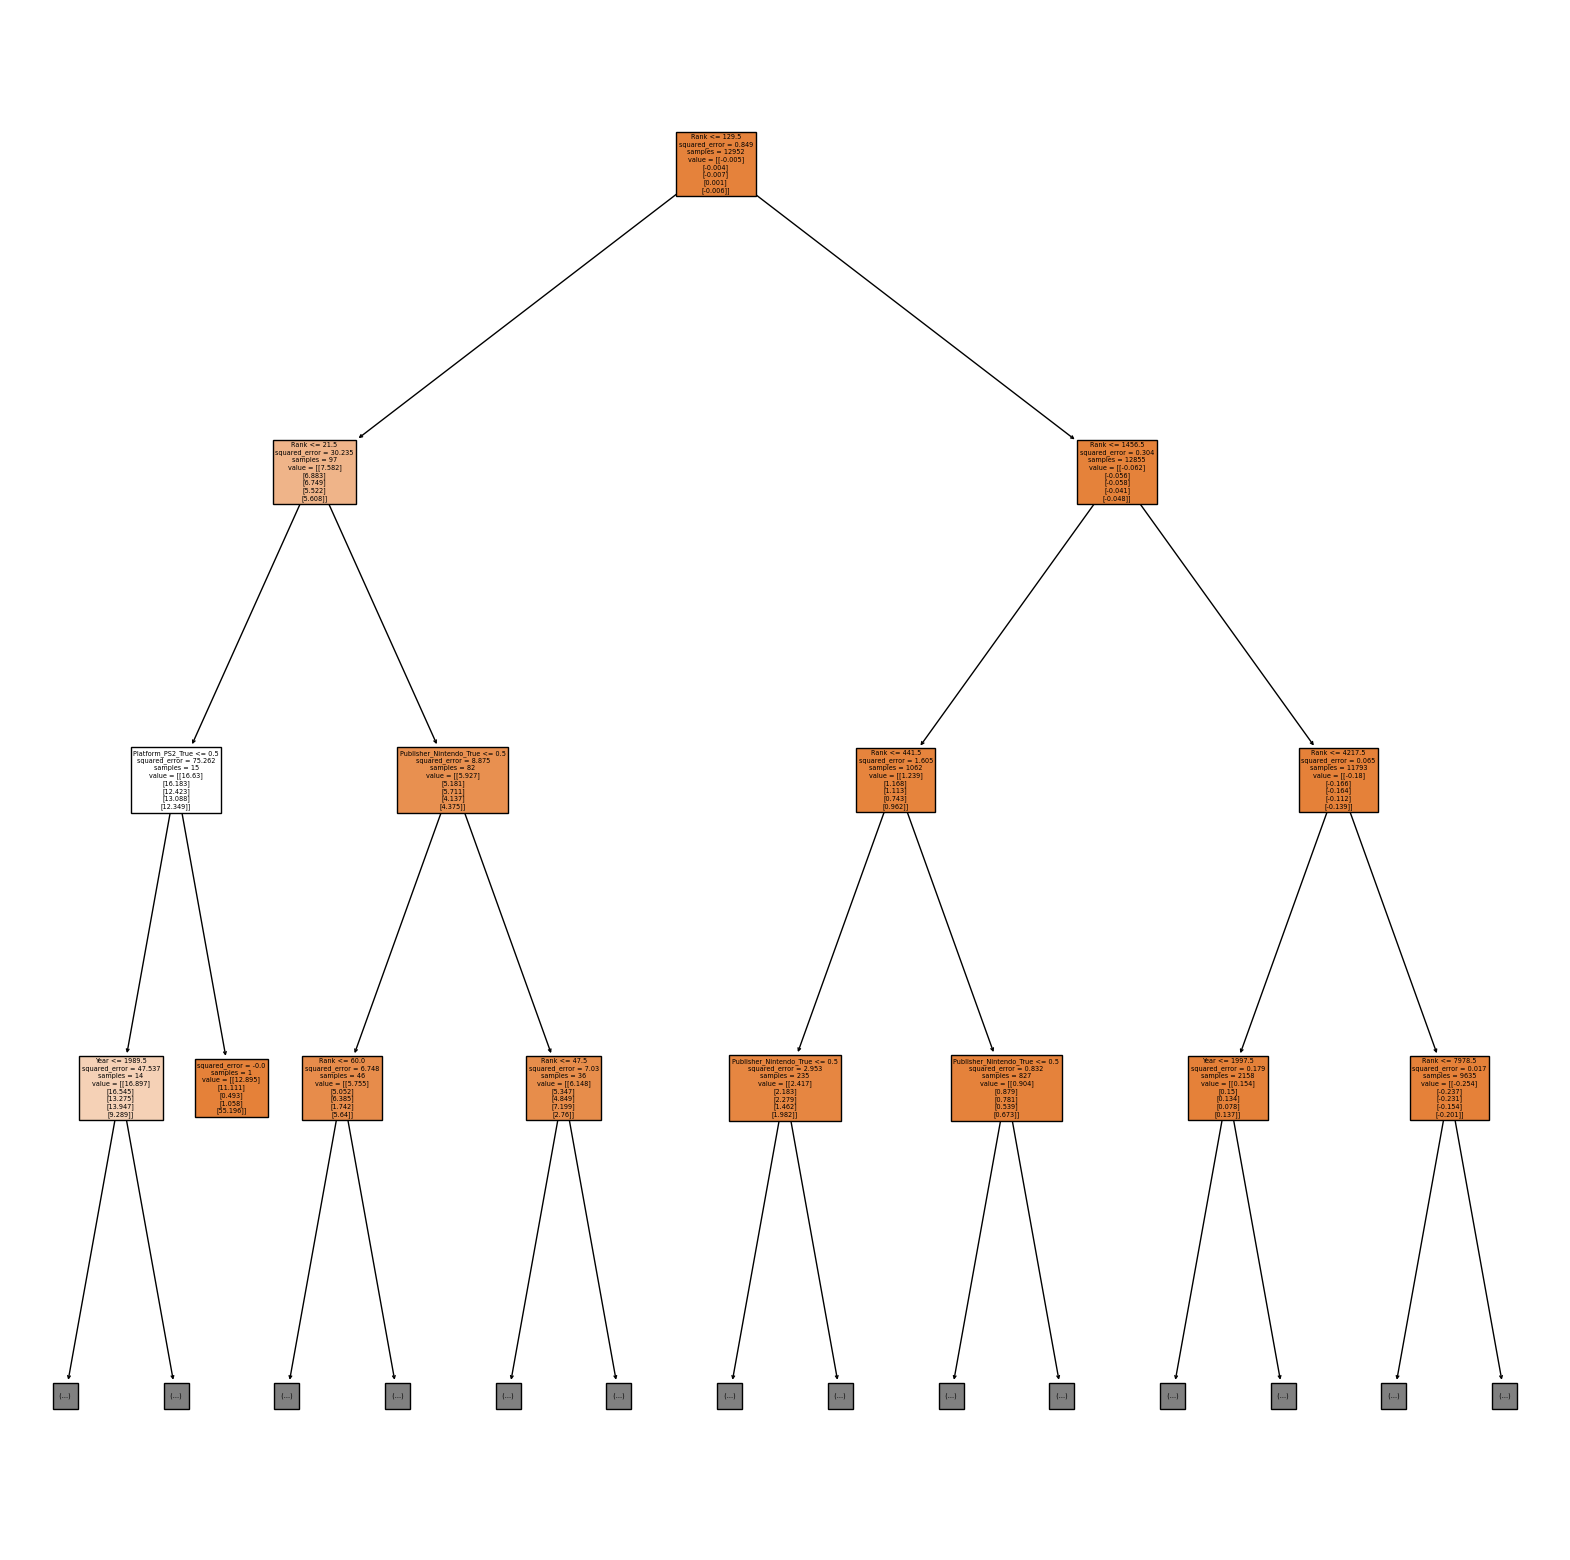

In [208]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = final.drop(columns=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])  # Example feature columns
y = final[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]  # Target columns

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Calculate MSE and R² for each target
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

# Print the results
for i, target in enumerate(y.columns):
    print(f"Target: {target}")
    print(f"  MSE: {mse[i]:.4f}")
    print(f"  R²: {r2[i]:.4f}")
    print()

# Visualize the tree (only the first target column for simplicity)
plt.figure(figsize=(20, 20))
tree.plot_tree(dt_model, filled=True, feature_names=list(X.columns), max_depth=3)
plt.show()


# For a third model, I will use Gradient Boosting in hopes that it will fit better with 'JP_sales' and 'Other_sales'.
# So far, the first two models work well with the entire dataset.

In [210]:
from sklearn.ensemble import GradientBoostingRegressor

# Loop through each target column
for target in y.columns:
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    
    # Train the model
    gb_model.fit(X_train, y_train[target])
    
    # Predict on the test set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate MSE and R²
    mse_gb = mean_squared_error(y_test[target], y_pred_gb)
    r2_gb = r2_score(y_test[target], y_pred_gb)
    
    # Print the results
    print(f"Target: {target}")
    print(f"  MSE: {mse_gb:.4f}")
    print(f"  R²: {r2_gb:.4f}")
    print()


Target: Global_Sales
  MSE: 0.2281
  R²: 0.8696

Target: NA_Sales
  MSE: 0.3971
  R²: 0.7539

Target: EU_Sales
  MSE: 0.4834
  R²: 0.7571

Target: JP_Sales
  MSE: 0.2898
  R²: 0.7069

Target: Other_Sales
  MSE: 0.6291
  R²: 0.6258



# We were able to see better performance this time with 'JP_sales'.

# Now to compare the three models and pick the best one.

In [211]:

# Create a DataFrame to store results for easy comparison
results = []

# Define the models and their predictions
models = {
    "Random Forest": {
        "mse": [0.4481, 0.5673, 0.2866, 0.6779, 0.3399],  # MSE for each target (NA_Sales, EU_Sales, etc.)
        "r2": [0.7223, 0.7149, 0.7101, 0.5968, 0.8057]      # R² for each target
    },
    "Decision Tree": {
        "mse": [0.4404, 0.5078, 0.6115, 0.7592, 0.2836],  # MSE for each target
        "r2": [0.7270, 0.7448, 0.3815, 0.5484, 0.8379]     # R² for each target
    },
    "Gradient Boosting": {
        "mse": [0.3971, 0.4834, 0.2898, 0.6291, 0.2281],  # MSE for each target
        "r2": [0.7539, 0.7571, 0.7069, 0.6258, 0.8696]     # R² for each target
    }
}

# Target names (same for all models)
targets = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Iterate over models and create a row for each model's performance
for model_name, metrics in models.items():
    row = {"Model": model_name}
    row.update({f"{target} MSE": metrics["mse"][i] for i, target in enumerate(targets)})
    row.update({f"{target} R²": metrics["r2"][i] for i, target in enumerate(targets)})
    results.append(row)

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results
print("Model Comparison Results:")
print(results_df)

# Identify the best model based on R² for Global_Sales (or any target)
best_model = results_df.loc[results_df['Global_Sales R²'].idxmax(), 'Model']
print(f"\nThe best model for predicting Global_Sales is: {best_model}")


Model Comparison Results:
               Model  Global_Sales MSE  NA_Sales MSE  EU_Sales MSE  \
0      Random Forest            0.4481        0.5673        0.2866   
1      Decision Tree            0.4404        0.5078        0.6115   
2  Gradient Boosting            0.3971        0.4834        0.2898   

   JP_Sales MSE  Other_Sales MSE  Global_Sales R²  NA_Sales R²  EU_Sales R²  \
0        0.6779           0.3399           0.7223       0.7149       0.7101   
1        0.7592           0.2836           0.7270       0.7448       0.3815   
2        0.6291           0.2281           0.7539       0.7571       0.7069   

   JP_Sales R²  Other_Sales R²  
0       0.5968          0.8057  
1       0.5484          0.8379  
2       0.6258          0.8696  

The best model for predicting Global_Sales is: Gradient Boosting


# From the three different models, Gradient Boosting provides the most accurate prediction across all targets.